# Sentiment Analysis

## Motivation

I am a huge movie buff. My favourite thing to do is to watch movies. And I wanted to try a sentiment analysis in Python. Therefore I thought it would be great to do a sentiment analysis on the IMDb datasets. 

## IMDb review dataset

Originally sourced from [Stanford](https://ai.stanford.edu/~amaas/data/sentiment/), I decided to use the nicely packaged version from [Kaggle](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?select=IMDB+Dataset.csv).

## additional movie data

These only provide the review as a score not as text available for sentiment analysis.

- [The Open Movie Database](http://www.omdbapi.com/) <br />
A RESTful API database to access movie information. Last updated 2019. <br />
- [Rotten Tomatoes](https://www.kaggle.com/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset) <br />
Good old Kaggle dataset from Rotten Tomatoes. Note for future self - to access Rotten Tomatoes API you need to register for a key and they will not give this out for general use. <br />
- [IMDb Datasets](https://www.imdb.com/interfaces/)<br />
Direct from the website (downloaded 12 October 2021)
- [IMDb Dataset 2](https://aws.amazon.com/marketplace/pp/prodview-rvhjlbc3larps?sr=0-1&ref_=beagle&applicationId=AWSMPContessa#usage)<br />
AWS IMDb dataset sample
- [FilmTV](https://www.kaggle.com/stefanoleone992/filmtv-movies-dataset)
Also from Kaggle. This data was scrapped 10 Sept 2021.

## Data preprocessing

In [35]:
# load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#download stopwords this way too?
# nltk.download('stopwords')


In [2]:
# load data
imdb_review_df = pd.read_csv('data/raw_data/IMDB Dataset.csv.zip')

Let's have a quick look at the data

In [3]:
imdb_review_df.describe(include='all')

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
imdb_review_df.isnull().count()

review       50000
sentiment    50000
dtype: int64

Let's check the sentiment column to see the distribution of positive and negative reviews.

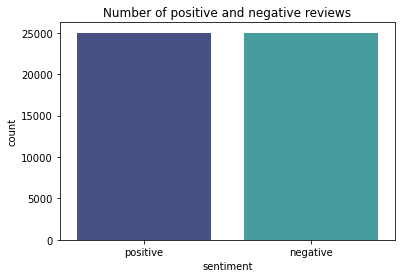

In [5]:
sns.countplot(x='sentiment', palette = 'mako', data=imdb_review_df)
plt.title('Number of positive and negative reviews');

Great! We have 50 000 reviews, half labelled as positive and the other half as negative. And the full review text. <br />
The review text is a little messy with markdown characters. Remove these before continuing.

In [6]:
imdb_review_df_clean = imdb_review_df.copy()

In [7]:
# replace punctuation characters in review
imdb_review_df_clean['review'] = imdb_review_df.review.str.replace(
    "[.;:!\'?,\"()\[\]]", "", regex=True).copy()

# replace markdown line breaks with a space
imdb_review_df_clean['review'] = imdb_review_df.review.str.replace(
    "(<br\s*/><br\s*/>)|(\-)|(\/)", " ", regex=True).copy()

# set review to lower case
imdb_review_df_clean['review'] = imdb_review_df_clean['review'].str.lower()


Word clouds! Let's do some of those...

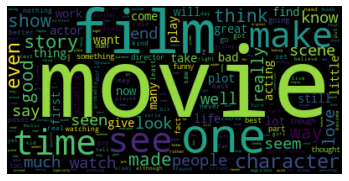

In [36]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in imdb_review_df_clean.review)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now the data can be split into train and test sections.

In [25]:
# make positive and negative df
imdb_review_df_clean_positive = imdb_review_df_clean[imdb_review_df_clean.sentiment == "positive"].reset_index(drop=True)
imdb_review_df_clean_negative = imdb_review_df_clean[imdb_review_df_clean.sentiment == "negative"].reset_index(drop=True)

# split in two
half_df = len(imdb_review_df_clean_positive) // 2
train_pos_df = imdb_review_df_clean_positive.iloc[:half_df,]
train_neg_df = imdb_review_df_clean_negative.iloc[:half_df,]

test_pos_df = imdb_review_df_clean_positive.iloc[half_df:,]
test_neg_df = imdb_review_df_clean_negative.iloc[half_df:,]

# rejoin - train and test split of 50%
train_df = pd.concat([train_pos_df, train_neg_df])
test_df = pd.concat([test_pos_df, test_neg_df])

And let's have a look at the positive and negative word clouds too!

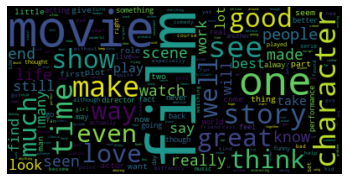

In [37]:
textt = " ".join(review for review in imdb_review_df_clean_positive.review)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

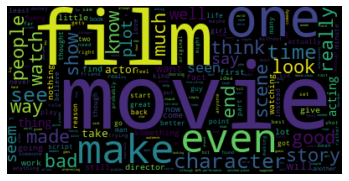

In [38]:
textt = " ".join(review for review in imdb_review_df_clean_negative.review)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ok now can look to vectorise the reviews for the sentiment analysis.

,review,sentiment
12495,this movie is spoofed in an episode of mystery...,negative
12496,an accurate review of nuremburg must consider ...,negative
12497,"admittedly, when the chance to see this horrib...",negative
12498,"to put in simple words or rather a word, would...",negative
12499,the film has so much potential which was not d...,negative
